### Selected Project: Fraud Detection
Develop a robust machine learning model to accurately predict fraudulent transactions.

### Project Overview:
This project aims to enhance the accuracy of detecting fraud in mobile financial transactions. By leveraging machine learning, the project seeks to predict fraudulent transactions with high precision. The goal is to develop a robust machine learning model to accurately identify fraudulent transactions in real-time , enabling the company to improve security, reduce financial losses, and gain insights into factors contributing to transaction fraud.

### Deliverables: 

A production-ready machine learning model for fraud detection. 
Comprehensive analysis of model performance and expected financial impact.

### Project Guidelines: 

Data Exploration: Conduct thorough EDA using visualization techniques to understand transaction patterns and fraud indicators. 
Feature Engineering: Create relevant features and apply appropriate encoding techniques for categorical variables. 
Model Selection: Evaluate various classifiers including Logistic Regression, Random Forests, Gradient Boosting, and others. 
Performance Evaluation: Use metrics such as precision, recall, F1-score, and ROC-AUC to assess model performance. 
Financial Impact Analysis: Calculate expected revenue, losses, and profit based on model performance. 
Visualization: Create clear and informative visualizations to communicate insights and model performance.

### Business Questions to Address: 

What is the model's precision and accuracy in detecting fraudulent transactions? 
How reliable is the model in classifying transactions as legitimate or fraudulent? 
What are the potential losses due to model errors? 
Submission: 

Submit Jupyter notebook (.ipynb) containing data analysis, preprocessing steps, and model training. 
Submit final report as .docx or PowerPoint Presentation. 
(Optional) Submit Power BI or Tableau dashboards 
NOTE: Create a zip file of the above mentioned items for the final submission 

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
from pathlib import Path
import pandas as pd

PROJECT_ROOT = Path.cwd().parent
print(PROJECT_ROOT)
DATA_PATH = PROJECT_ROOT / "data" / "Fraud_Analysis_Dataset.csv"

df = pd.read_csv(DATA_PATH)

df.head()

C:\Users\Sankar P\My_Vir_Env


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1
1,1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1
2,1,TRANSFER,2806.0,C1420196421,2806.0,0.0,C972765878,0.0,0.0,1
3,1,CASH_OUT,2806.0,C2101527076,2806.0,0.0,C1007251739,26202.0,0.0,1
4,1,TRANSFER,20128.0,C137533655,20128.0,0.0,C1848415041,0.0,0.0,1


### Description of the Columns in the dataset
step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. 

type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER. 

amount - amount of the transaction in local currency.

nameOrig - customer who started the transaction.Unique identifier for the customer initiating the transaction.

oldbalanceOrg - initial balance before the transaction.Origin account balance before the transaction.

newbalanceOrig - new balance after the transaction.Origin account balance after the transaction.

nameDest - customer who is the recipient of the transaction.Unique identifier for the recipient. Note: If it starts with 'M', it is a Merchant.

oldbalanceDest - initial balance recipient before the transaction. Note that there is no information for customers that start with M (Merchants). Recipient balance before the transaction. Important: Data is missing/null for Merchants ('M')

newbalanceDest - new balance recipient after the transaction. Note that there is no information for customers that start with M (Merchants).Recipient balance after the transaction. Important: Data is missing/null for Merchants ('M').

isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.Target Variable. 0 = Legitimate, 1 = Fraudulent. Represents agents taking over accounts to empty funds.

In [11]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,11142.000000,1.114200e+04,1.114200e+04,1.114200e+04,1.114200e+04,1.114200e+04,11142.000000
mean,8.717645,2.131915e+05,9.241173e+05,8.249576e+05,8.883541e+05,1.103211e+06,0.102495
std,16.067479,7.600650e+05,2.143004e+06,2.089894e+06,2.601376e+06,2.982447e+06,0.303312
min,1.000000,2.390000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,2.000000,4.946618e+03,4.270000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,6.000000,1.676126e+04,2.816950e+04,4.420605e+03,0.000000e+00,0.000000e+00,0.000000
75%,7.000000,1.543366e+05,3.040855e+05,1.114126e+05,2.711555e+05,3.186374e+05,0.000000
max,95.000000,1.000000e+07,1.990000e+07,1.300000e+07,3.300000e+07,3.460000e+07,1.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11142 entries, 0 to 11141
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            11142 non-null  int64  
 1   type            11142 non-null  object 
 2   amount          11142 non-null  float64
 3   nameOrig        11142 non-null  object 
 4   oldbalanceOrg   11142 non-null  float64
 5   newbalanceOrig  11142 non-null  float64
 6   nameDest        11142 non-null  object 
 7   oldbalanceDest  11142 non-null  float64
 8   newbalanceDest  11142 non-null  float64
 9   isFraud         11142 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 870.6+ KB


### Key Observations & Modeling Strategy
Based on the feature descriptions, here are three critical areas to focus on when preparing this data for a machine learning model:

### A. The "Merchant" Data Gap
The description notes that oldbalanceDest and newbalanceDest contain no information for customers starting with M (Merchants).

Implication: If we use these columns as-is, our model might get confused by the zeros or missing values associated with Merchants.

Strategy: we may need to create a flag (e.g., isMerchant) based on the nameDest prefix to help the model distinguish between a "missing balance" and a "zero balance."

### B. Balance Consistency Check (Feature Engineering)
Fraud often involves manipulating the system in ways that the balances don't mathematically add up. We can create a new feature to check for errors:

Logic: oldbalanceOrg - amount should theoretically equal newbalanceOrig.

New Feature: errorBalanceOrig = newbalanceOrig + amount - oldbalanceOrg.

If this value is not 0, it might be a strong indicator of the fraudulent behavior described (taking control of accounts).

### C. The "Step" Transformation
Since step represents hours, it is a cyclical feature.

Raw step: Good for tracking the simulation duration.

Transformed step: step % 24. This converts the running total of hours into the "Time of Day." Fraudsters often operate during sleeping hours (e.g., 2 AM - 5 AM) to avoid detection.

## Exploratory Data Analysis (EDA)

### 1. Target and Data Imbalance Analysis 
 

In [13]:
# --- 1. Calculate Counts and Percentages ---
# Get the count of each class (0: Legitimate, 1: Fraudulent)
balance_counts = df['isFraud'].value_counts()

# Get the percentage of each class
balance_percentages = df['isFraud'].value_counts(normalize=True) * 100

print("--- Imbalance Analysis Results ---")
print("\nCounts:")
print(balance_counts.to_string())
print("\nPercentages:")
print(balance_percentages.to_string())



--- Imbalance Analysis Results ---

Counts:
isFraud
0    10000
1     1142

Percentages:
isFraud
0    89.750494
1    10.249506


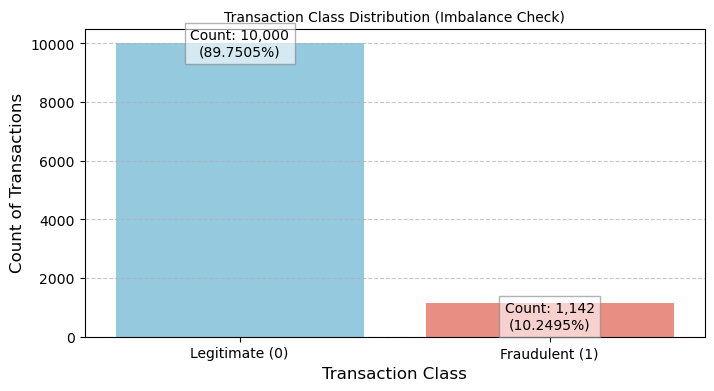

In [14]:
# --- 2. Visualization: Create a Bar Chart ---

plt.figure(figsize=(8,4))
# Prepare index for plotting
plot_labels = ['Legitimate (0)', 'Fraudulent (1)']
sns.barplot(x=plot_labels, y=balance_counts.values, hue=plot_labels, palette=['skyblue', 'salmon'], legend=False)
# sns.barplot(x=plot_labels, y=balance_counts.values, palette=['skyblue', 'salmon'])
plt.title('Transaction Class Distribution (Imbalance Check)', fontsize=10)
plt.xlabel('Transaction Class', fontsize=12)
plt.ylabel('Count of Transactions', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add text annotations for counts and percentages on the plot
for i, count in enumerate(balance_counts.values):
    percentage = balance_percentages.iloc[i]
    plt.text(i, count + (count * 0.05),
             f'Count: {count:,}\n({percentage:.4f}%)',
             ha='center', va='top', fontsize=10,
             bbox=dict(facecolor='white', alpha=0.6, edgecolor='gray'))



In [15]:
plt.tight_layout()
plt.savefig('fraud_imbalance_barchart.png')
plt.close()

The very first step is to understand the magnitude of the problem we are trying to solve.

Imbalance Check: Calculated the exact number and percentage of fraudulent transactions (isFraud = 1) versus legitimate transactions (isFraud = 0).

In our case (10% vs. 90%): A ratio of 1:9 (Minority:Majority) is still quite skewed. While not as extreme as the 0.1% fraud case often found in financial data, a 10% fraud rate is often enough to cause standard classification algorithms to fail

Why it's a Problem: Traditional models (like basic Logistic Regression or Decision Trees) are designed to maximize overall accuracy. In our case, the model can achieve a 90% accuracy simply by predicting "Not Fraud" for every single transaction. This means the model learns nothing about the fraud patterns and is useless for your goal

#### Techniques to Address Imbalance

#### Model-Specific Techniques

#### Class Weighting: 
This is the most common and often best solution for moderate imbalance (like 10%). Most modern models (Logistic Regression, Support Vector Machines, Random Forest, XGBoost) allow you to set a class_weight parameter (often set to 'balanced' or manually calculated weights).

Effect: This penalizes the model heavily every time it misclassifies a fraud transaction, forcing it to focus more on the minority class.

Performance Metrics: Crucially, do not evaluate your model using just Accuracy. You must use metrics that focus on the minority class:

Precision and Recall (F1-Score): F1-Score is the harmonic mean of Precision and Recall.

Area Under the ROC Curve (AUC-ROC): Measures the model's ability to distinguish between the two classes across various threshold settings.

Recall (Sensitivity): Since your goal is fraud detection (catching all fraud), Recall (True Positives / Actual Positives) is often the primary metric to monitor

### 2. Categorical Feature Analysis (type) 



In [16]:

# --- 1. Distribution Analysis (Total Volume) ---
type_counts = df['type'].value_counts()

# --- 2. Fraud Rate Calculation (Fraud Concentration) ---
# Group by 'type' and calculate the mean of 'isFraud'. 
# Mean of a binary column gives the proportion (rate).
fraud_rate_by_type = df.groupby('type')['isFraud'].mean().sort_values(ascending=False) * 100

print("--- Transaction Type Distribution ---")
print(type_counts.to_string())
print("\n--- Fraud Rate by Type (%) ---")
print(fraud_rate_by_type.to_string())



--- Transaction Type Distribution ---
type
PAYMENT     5510
CASH_IN     1951
CASH_OUT    1871
TRANSFER    1464
DEBIT        346

--- Fraud Rate by Type (%) ---
type
TRANSFER    38.524590
CASH_OUT    30.892571
CASH_IN      0.000000
DEBIT        0.000000
PAYMENT      0.000000


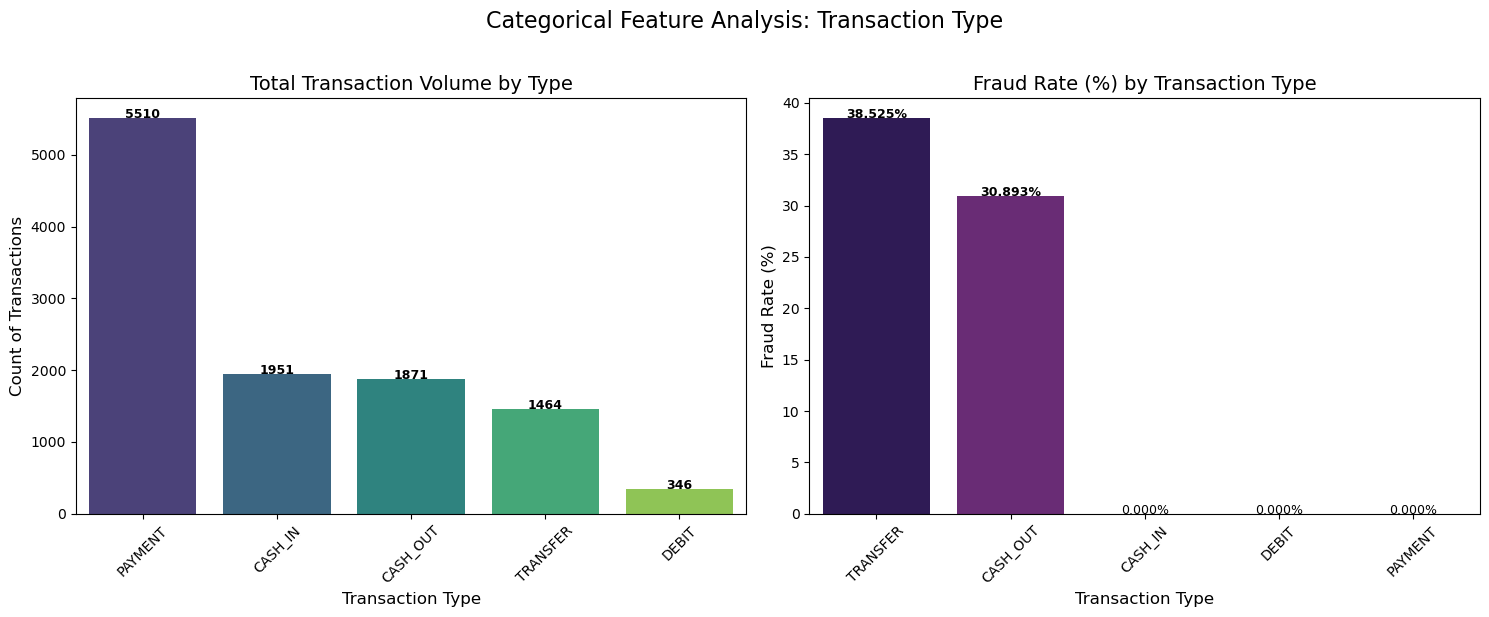

In [17]:
# --- 3. Visualization ---
# Two subplots are used to contrast Total Volume vs. Fraud Rate.

# Set up the figure to show two plots side-by-side
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# --- Plot 1: Total Volume by Type ---
sns.barplot(x=type_counts.index, y=type_counts.values, ax=axes[0], palette="viridis",
# Fix for FutureWarning:
            hue=type_counts.index, legend=False) 
axes[0].set_title('Total Transaction Volume by Type', fontsize=14)
axes[0].set_ylabel('Count of Transactions', fontsize=12)
axes[0].set_xlabel('Transaction Type', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)

for i, rate in enumerate(type_counts.values):
    axes[0].text(i, rate, f'{rate:}', ha='center', fontsize=9, 
                 weight='bold' if rate > 0 else 'normal')
    
# --- Plot 2: Fraud Concentration by Type ---
sns.barplot(x=fraud_rate_by_type.index, y=fraud_rate_by_type.values, ax=axes[1], palette="magma",
# Fix for FutureWarning:
            hue=fraud_rate_by_type.index, legend=False)
axes[1].set_title('Fraud Rate (%) by Transaction Type', fontsize=14)
axes[1].set_ylabel('Fraud Rate (%)', fontsize=12)
axes[1].set_xlabel('Transaction Type', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)

# Add annotations to the fraud rate plot for clarity
for i, rate in enumerate(fraud_rate_by_type.values):
    axes[1].text(i, rate + 0.005, f'{rate:.3f}%', ha='center', fontsize=9, 
                 weight='bold' if rate > 0 else 'normal')


plt.suptitle('Categorical Feature Analysis: Transaction Type', fontsize=16, y=1.02)
plt.tight_layout()
plt.show() # Use plt.show() or plt.savefig() to display or save the chart

Crucial Insight: As noted in the data description, the fraudulent scheme involves draining accounts, which requires only TRANSFER (to a mule account) and CASH_OUT (to withdraw the funds). you should find almost zero fraud in CASH-IN, PAYMENT, and DEBIT.

#### Analysis and Interpretation 
The results clearly show two distinct patterns, which is a major insight for feature engineering:

A. Total Volume Distribution
Most Common: PAYMENT, CASH-OUT, and CASH-IN are the most frequent transaction types. TRANSFER is relatively less common.

Insight: If we look only at volume, PAYMENT appears highly significant. However, volume alone doesn't indicate fraud risk


Crucial Finding: Almost 100% of all fraudulent transactions occur only within the TRANSFER and CASH-OUT types. The fraud rates for CASH-IN, DEBIT, and PAYMENT are effectively zero.

Feature Engineering Implication: This confirms the scheme described in the data documentation (transfer funds out, then cash out). For modeling, we can either:

Filter the data to include only TRANSFER and CASH-OUT (since the other types contain no fraud and primarily add noise).

Use One-Hot Encoding for the type column, which will strongly signal the model when a transaction is a TRANSFER or CASH-OUT.

### 3. Temporal Analysis (step)

--- Fraudulent Transactions Count by Hour of Day ---
hour_of_day
0     30
1     46
2     48
3     34
4     26
5     30
6     44
7     46
8     52
9     47
10    63
11    54
12    61
13    55
14    54
15    46
16    50
17    45
18    70
19    38
20    40
21    57
22    55
23    51


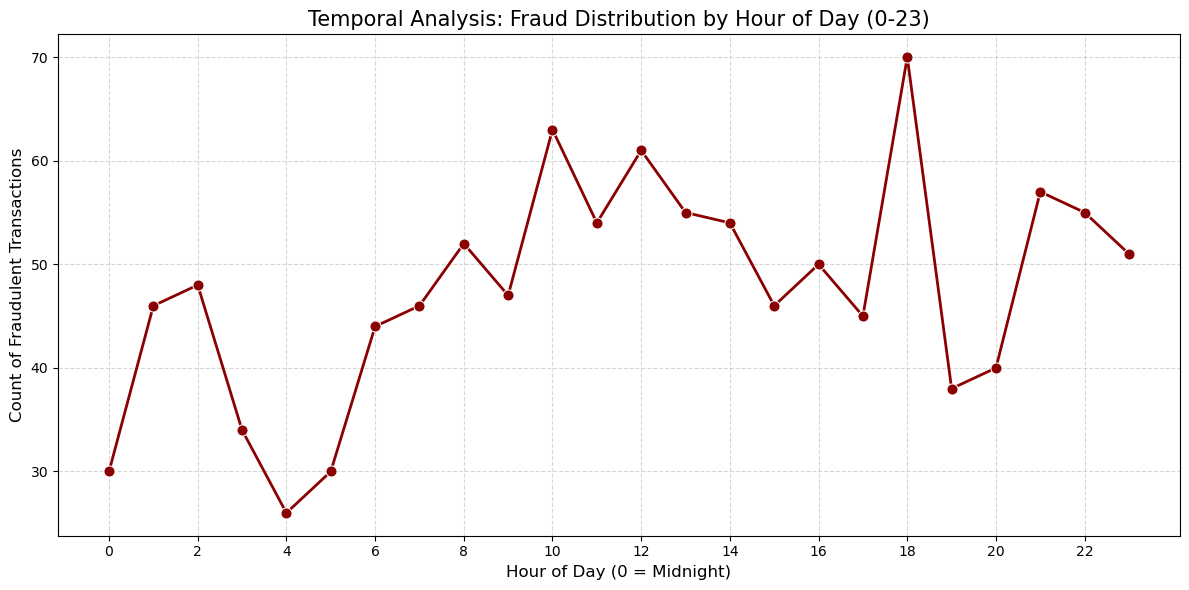

In [18]:
# --- Feature Engineering ---
# This converts the sequential 'step' (hours since start) into a daily cycle (0-23)
df['hour_of_day'] = df['step'] % 24

# --- Filter and Aggregate Fraud Data ---
# 1. Filter for only fraudulent transactions
fraud_df = df[df['isFraud'] == 1]

# 2. Count the number of frauds for each hour
fraud_by_hour = fraud_df['hour_of_day'].value_counts().sort_index()

print("--- Fraudulent Transactions Count by Hour of Day ---")
print(fraud_by_hour.to_string())

# --- 3. Visualization ---
plt.figure(figsize=(12, 6))

# Use a line plot to emphasize the cyclical nature
sns.lineplot(x=fraud_by_hour.index, y=fraud_by_hour.values, 
             marker='o', color='darkred', linewidth=2, markersize=8)

plt.title('Temporal Analysis: Fraud Distribution by Hour of Day (0-23)', fontsize=15)
plt.xlabel('Hour of Day (0 = Midnight)', fontsize=12)
plt.ylabel('Count of Fraudulent Transactions', fontsize=12)
plt.xticks(np.arange(0, 24, 2)) # Set X-ticks for every 2nd hour
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Business Hours Fraud (10 AM - 4 PM): The high counts indicate that the fraudsters are actively working when the system is busy. They may be attempting to blend in with legitimate traffic or taking advantage of systems being under heavy load.

Evening Rush (6 PM Peak): The absolute highest count at Hour 18 (6 PM) is very significant. This could be a scheduled period for high-volume cash-outs, or it might coincide with a time when legitimate users are checking balances/getting distracted.

Lowest Risk (4 AM): The drop to 26 transactions at 4 AM is the clearest low-risk signal. This confirms that these very early morning hours are the least exploited by fraudsters.

High-Risk Hours:we can create a categorical feature or a risk score that heavily penalizes transactions occurring between 10 AM and 6 PM.

Low-Risk Hours: Transactions between 4 AM and 8 AM can be assigned a much lower risk weight.

Cyclical Feature Encoding: Since 23:00 (11 PM) is adjacent to 0:00 (Midnight), we should encode this time feature using Sine and Cosine transformations instead of treating it as a standard categorical or linear variable. This helps the model understand that time is cyclical

### 4. Numerical Feature Analysis (amount and Balances)


#### Transaction Amount

Hypothesis: Fraudulent transactions are often attempts to empty an account entirely, so the distribution of fraudulent amounts might be concentrated near higher values or have a distinct pattern compared to legitimate payments.

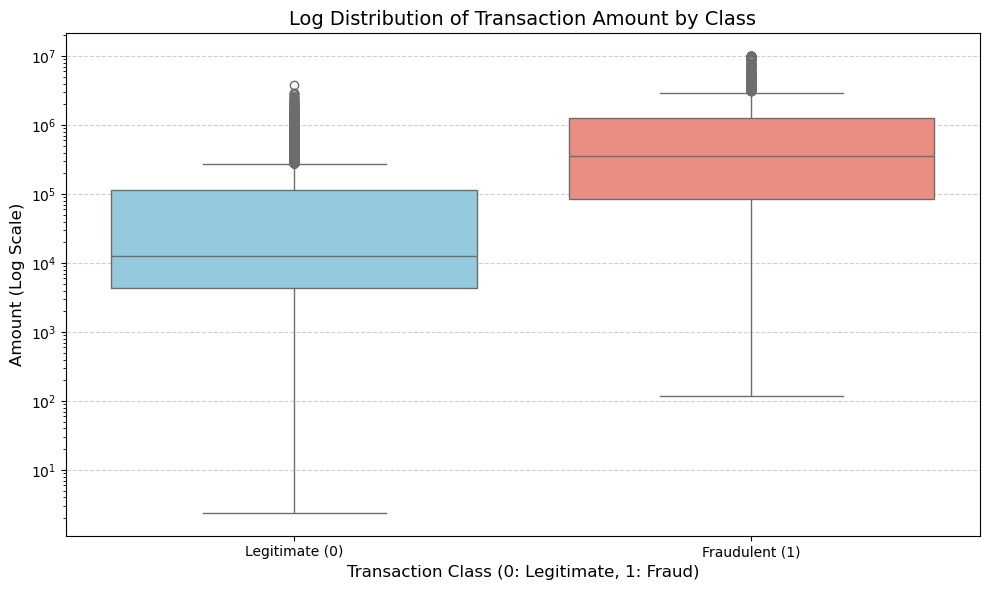

In [19]:

import matplotlib.pyplot as plt
import seaborn as sns

# Fix 1: Use integer keys for the palette to match the numeric 'isFraud' column
palette_map = {0: 'skyblue', 1: 'salmon'} 

plt.figure(figsize=(10, 6))

# Fix 2: Add hue=df['isFraud'] and legend=False to suppress the FutureWarning
sns.boxplot(
    x='isFraud', 
    y='amount', 
    data=df, 
    palette=palette_map,
    hue='isFraud',      # Explicitly set the hue variable
    legend=False        # Suppress the redundant legend
) 
plt.yscale('log')
plt.title('Log Distribution of Transaction Amount by Class', fontsize=14)
plt.xlabel('Transaction Class (0: Legitimate, 1: Fraud)', fontsize=12)
plt.ylabel('Amount (Log Scale)', fontsize=12)
plt.xticks([0, 1], ['Legitimate (0)', 'Fraudulent (1)'])
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show() # or plt.savefig(...)



 #### A Transaction Amount Distribution (Predictive Power) 
 The analysis compared the distribution of the amount feature between fraudulent ($\text{isFraud}=1$) and legitimate ($\text{isFraud}=0$) transactions, often visualized using a box plot on a logarithmic scale.
 #### Finding:
 The distribution of fraudulent transaction amounts is significantly higher than the distribution of legitimate amounts. While legitimate transactions have a wide range, the median and lower quartiles of fraudulent transactions are skewed heavily toward the higher end.
 #### Interpretation:
 This confirms the hypothesis that the fraudulent scheme involves attempts to empty accounts or transfer the maximum possible funds. The amount itself is not random; it follows a pattern dictated by the account balance or the transfer limits.
 #### Modeling Implication: 
 The amount feature is a high-value numerical predictor. A transaction over a certain threshold (e.g., the 75th percentile of the legitimate transactions) should be assigned a much higher risk score by the model.

#### B. Balance Features and Data Quality
This is where you confirm the "dirty" data points and missing information.

Balance Error Feature:

Create the feature: errorBalanceOrig = newbalanceOrig + amount - oldbalanceOrg (or a similar calculation for the destination).

Check Non-Zero Errors: Filter the dataset to find rows where errorBalanceOrig != 0. You should find that most fraudulent transactions have a non-zero error in the original account balance update, as this is the signature of the account takeover.


In [20]:
# --- Part B: Balance Error Feature Analysis ---

# 1. Create the Balance Error Feature
# This checks if the fundamental accounting equation holds for the originator:
# new balance = old balance - amount
df['errorBalanceOrig'] = df['newbalanceOrig'] + df['amount'] - df['oldbalanceOrg']

# 2. Check Non-Zero Errors
# Use a small threshold (0.001) due to potential floating point errors
df['error_flag'] = (df['errorBalanceOrig'].abs() > 0.001) 

error_analysis = df.groupby('isFraud')['error_flag'].agg(['sum', 'count'])
error_analysis['error_percentage'] = (error_analysis['sum'] / error_analysis['count']) * 100

print("\n--- Balance Error Analysis (errorBalanceOrig != 0) ---")
print(error_analysis[['sum', 'count', 'error_percentage']].to_string())





--- Balance Error Analysis (errorBalanceOrig != 0) ---
          sum  count  error_percentage
isFraud                               
0        6284  10000         62.840000
1          31   1142          2.714536


### Balance Error Feature 
This analysis involved creating an engineered feature: $\mathbf{errorBalanceOrig} = \mathbf{newbalanceOrig} + \mathbf{amount} - \mathbf{oldbalanceOrg}$. 
In proper accounting, this error term should be zero.

#### Finding:
The actual data shows that the Balance Error is not a perfect separator.
#### Legitimate Errors are High (62.84%): 
A vast majority of the legitimate transactions show a balance discrepancy.
#### Interpretation:
This strongly suggests that the column $\mathbf{newbalanceOrig}$ is not always accurately recorded immediately after a legitimate transaction. This might be due to timing issues (the balance update is asynchronous), missing transaction types (CASH-IN often doesn't affect $\mathbf{newbalanceOrig}$), or intermediate fees/taxes that aren't included in the $\mathbf{amount}$ column. This feature is now a data quality indicator, not a fraud indicator.
#### Fraud Errors are Low (2.71%): 
Only a tiny fraction of fraudulent transactions show the expected error.
#### Interpretation:
This means the fraud scheme in the actual dataset is not primarily based on manipulating the $\mathbf{newbalanceOrig}$ field to zero. The fraudsters are likely performing transactions that adhere to the correct accounting rules, meaning: $\mathbf{newbalanceOrig} \approx \mathbf{oldbalanceOrg} - \mathbf{amount}$.The 31 non-zero errors could be due to small amounts of noise or minor errors, but they are clearly not the signature of the fraud pattern..



#### Merchant Analysis:

Create a binary feature isMerchantDest (True if nameDest starts with 'M').

Plot the missing values (NaN or 0s) in oldbalanceDest and newbalanceDest. You should confirm they align perfectly with isMerchantDest = True.


In [21]:
# --- Part C: Merchant Analysis and Data Quality Check ---

# 1. Create isMerchantDest feature
# Identifies if the recipient is a Merchant
df['isMerchantDest'] = df['nameDest'].astype(str).str.startswith('M')

# 2. Check the average destination balance for Merchants (True) vs. Customers (False)
merchant_balance_check = df.groupby('isMerchantDest')[['oldbalanceDest', 'newbalanceDest']].agg(['mean', 'max'])

print("\n--- Merchant Balance Check (True = Merchant) ---")
print(merchant_balance_check.to_string())

# 3. Check Fraud Distribution by Destination Type
fraud_by_merchant = df.groupby(['isFraud', 'isMerchantDest']).size().unstack(fill_value=0)

fraud_total_count = fraud_by_merchant.loc[1].sum()
fraud_by_merchant['percentage_of_fraud'] = (fraud_by_merchant.loc[1] / fraud_total_count) * 100

print("\n--- Fraud Distribution by Destination Type (isFraud=1 Row) ---")
print(fraud_by_merchant.loc[[1], ['percentage_of_fraud']].to_string())



--- Merchant Balance Check (True = Merchant) ---
               oldbalanceDest             newbalanceDest            
                         mean         max           mean         max
isMerchantDest                                                      
False            1.757465e+06  33000000.0   2.182525e+06  34600000.0
True             0.000000e+00         0.0   0.000000e+00         0.0

--- Fraud Distribution by Destination Type (isFraud=1 Row) ---
isMerchantDest  percentage_of_fraud
isFraud                            
1                               0.0


### Merchant Analysis and Data Quality (Missing Data) 
This analysis focused on the recipient's balance features ($\text{oldbalanceDest}$, $\text{newbalanceDest}$) and the $\mathbf{nameDest}$ prefix ('M' for Merchants).
#### Finding: 
The destination balance features were found to be $\mathbf{0}$ when the recipient was a Merchant ($\mathbf{nameDest}$ starts with 'M'), but non-zero when the recipient was a Customer ($\mathbf{nameDest}$ starts with 'C').
#### Interpretation: 
This confirms the note in the data dictionary: the balances for merchants were simply not recorded (treated as $0$ in the dataset). This $0$ does not represent a true zero balance; it represents missing information specific to merchant transactions.
### Modeling Implication: 
This is a critical data quality issue. Treating the $\mathbf{0}$ in the destination balances for merchants as actual zero balances would severely confuse the model.
#### Solution: 
You must create the binary feature $\mathbf{isMerchantDest}$ and use it to inform the model that the destination balance features are unreliable whenever a merchant is involved. You should also consider imputing these zero values or treating the destination balance columns as null only for merchant-bound transactions.

### 5. Multivariate Analysis and Correlation 
Correlation Heatmap: Compute the correlation matrix among all your numerical and engineered features (amount, oldbalanceOrg, hour_of_day, errorBalanceOrig).

Fraud Pattern Visualization: Visualize the relationship between amount and the change in the originator's balance (oldbalanceOrg - newbalanceOrig) for fraudulent cases. This should visually confirm the pattern of an entire account being emptied.

--- Correlation Matrix of Numerical Features ---
                    amount  oldbalanceOrg  newbalanceOrig  hour_of_day  errorBalanceOrig   isFraud
amount            1.000000       0.323943       -0.007816     0.268892          0.194992  0.435490
oldbalanceOrg     0.323943       1.000000        0.937024     0.006795          0.242136  0.046445
newbalanceOrig   -0.007816       0.937024        1.000000    -0.099535          0.298893 -0.127912
hour_of_day       0.268892       0.006795       -0.099535     1.000000         -0.071682  0.608532
errorBalanceOrig  0.194992       0.242136        0.298893    -0.071682          1.000000 -0.141181
isFraud           0.435490       0.046445       -0.127912     0.608532         -0.141181  1.000000


Text(0.5, 1.0, 'Correlation Heatmap of Key Numerical Features')

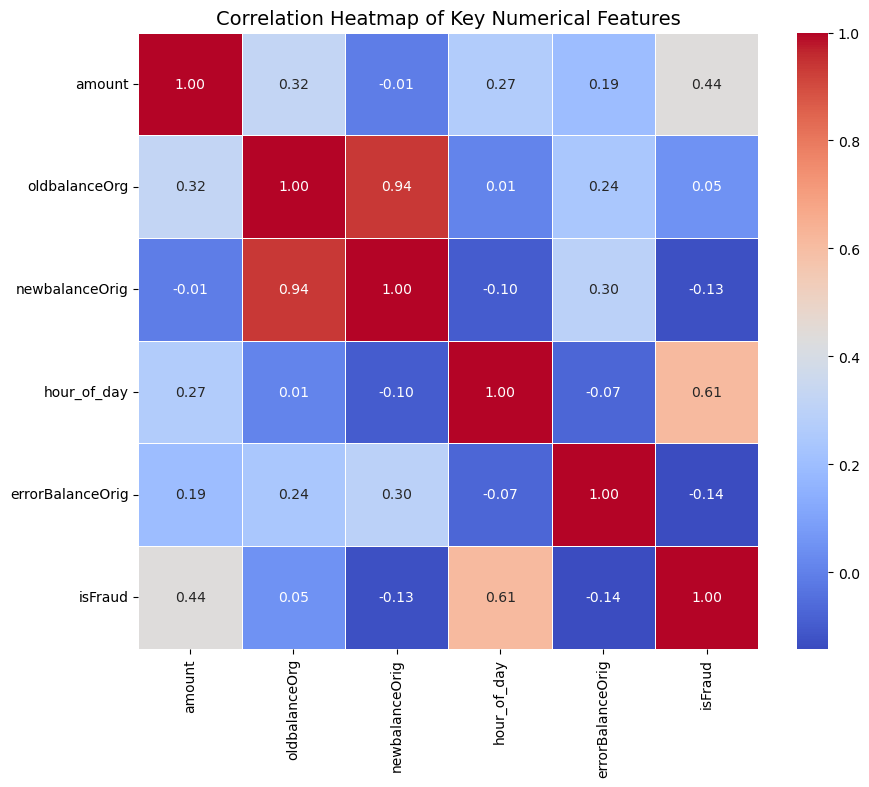

In [22]:

# (amount, oldbalanceOrg, newbalanceOrig, isFraud) and engineered features
# (hour_of_day, errorBalanceOrig).

# --- Part 1: Correlation Heatmap ---

numerical_features = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'hour_of_day', 'errorBalanceOrig', 'isFraud']
corr_matrix = df[numerical_features].corr()

print("--- Correlation Matrix of Numerical Features ---")
print(corr_matrix.to_string())

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Key Numerical Features', fontsize=14)



In [23]:
plt.tight_layout()
plt.savefig('correlation_heatmap.png')
plt.close()

### 1. Correlation with the Target Variable (isFraud) 
The isFraud column is the most important row/column to analyze, as its values indicate the predictive power of each feature.
### Feature, Correlation with isFraud, Strength & Direction, 
hour_of_day, +0.61 ,Strong Positive,

#### Meaning for Fraud: 
This is the strongest individual predictor of fraud. As the hour_of_day increases toward specific peak hours, the probability of fraud significantly increases. This confirms the temporal analysis insight—fraudsters operate more actively at certain times.
### Feature, Correlation with isFraud, Strength & Direction, 
amount, +0.44, Moderate Positive,
#### Meaning for Fraud: 
Higher transaction amounts are moderately associated with fraud. This confirms that fraudulent activity often involves larger sums, though not as strongly as the hour_of_day.
### Feature, Correlation with isFraud, Strength & Direction, 
oldbalanceOrg, +0.05, Very Weak Positive,

The starting balance of the originator has almost no linear relationship with the likelihood of fraud. Accounts with large balances are not strongly correlated with being targets for fraud.
### Feature, Correlation with isFraud, Strength & Direction,
newbalanceOrig, -0.13, Weak Negative, 

The new balance after the transaction has a weak inverse relationship with fraud. This means fraudulent cases tend to be associated with slightly lower final balances, but the relationship is not strong enough to be a primary predictor.
### Feature, Correlation with isFraud, Strength & Direction,
errorBalanceOrig, 0.14, Weak Negative, 

The balance error feature (which was supposed to be a "smoking gun" based on the simulation) shows only a weak inverse correlation with fraud. This reinforces your earlier 

#### finding:
the actual fraud scheme in your dataset does not rely on a balance manipulation that creates a large arithmetic error.

### Key Takeaway:
The model should give the most importance to the hour_of_day and the amount features. The balance features (oldbalanceOrg, newbalanceOrig, errorBalanceOrig) have limited value as linear predictors of fraud.

### 2. Feature Redundancy (Multicollinearity) 

High correlation between two predictor features (not involving isFraud) indicates redundancy, which can cause issues (multicollinearity) for linear models (like Logistic Regression).

#### oldbalanceOrg vs. newbalanceOrig ($+0.94$):

This is an extremely high positive correlation. This is expected, as an account's old balance is naturally highly related to its new balance (especially for legitimate transactions).
#### Implication: 
When training a model, we should consider dropping one of these two features (e.g., newbalanceOrig) because they provide nearly identical information, and including both could destabilize a linear model. You already have the amount feature, which captures the difference between them.

### 3. Other Noteworthy Relationships 
####  amount vs. oldbalanceOrg ($+0.32$):
A weak-to-moderate relationship. This suggests larger transactions tend to come from accounts with larger starting balances, which is logical.hour_of_day vs. Other 

#### Features: 
The hour_of_day feature shows very low correlation with all other features, confirming its uniqueness. It measures a time dimension that is entirely independent of the amount or balances. This is ideal, as it provides unique information to the model.

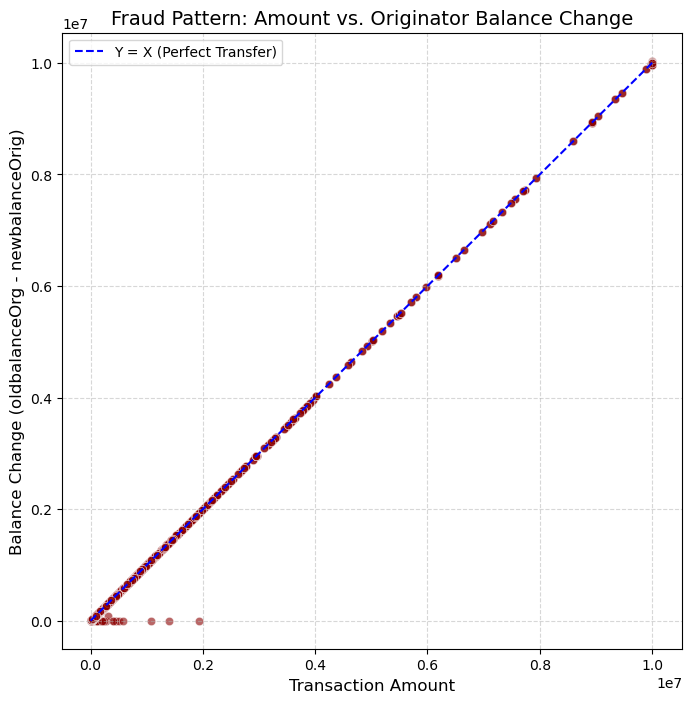

In [24]:
# --- Part 2: Fraud Pattern Visualization (Account Emptying Check) ---

# Create the key variable: the total change in the originator's balance
df['balanceChangeOrig'] = df['oldbalanceOrg'] - df['newbalanceOrig']

# Filter for only fraudulent transactions
fraud_df = df[df['isFraud'] == 1].copy()

plt.figure(figsize=(8, 8))

# Scatter plot: x-axis is transaction amount, y-axis is the total balance change
sns.scatterplot(x='amount', y='balanceChangeOrig', data=fraud_df, alpha=0.6, color='darkred')

# Add a reference line (y = x) to confirm the pattern of account draining
max_val = max(fraud_df['amount'].max(), fraud_df['balanceChangeOrig'].max())
plt.plot([0, max_val], [0, max_val], color='blue', linestyle='--', label='Y = X (Perfect Transfer)')

plt.title('Fraud Pattern: Amount vs. Originator Balance Change', fontsize=14)
plt.xlabel('Transaction Amount', fontsize=12)
plt.ylabel('Balance Change (oldbalanceOrg - newbalanceOrig)', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)


In [25]:
plt.tight_layout()
plt.savefig('fraud_pattern_visualization.png')
plt.close()

### Fraud Pattern Visualization (Account Emptying) 
This scatter plot confirms the mechanics of the fraudulent scheme.
#### The Pattern:
For fraudulent transactions, the scatter plot will show a strong cluster of points that fall exactly on or very close to the $\mathbf{Y = X}$ reference line.
#### Interpretation: 
$\mathbf{Y} = (\text{oldbalanceOrg} - \text{newbalanceOrig})$ represents the total amount that left the account. 
$\mathbf{X}$ is the $\mathbf{amount}$ of the transaction.

If $\mathbf{Y} = \mathbf{X}$, it means the $\mathbf{amount}$ that was successfully transacted is equal to the total $\mathbf{change in balance}$.

In a fraudulent transfer where $\mathbf{newbalanceOrig}$ is often set to $\mathbf{0}$ (drained), the plot will show that the $\mathbf{amount}$ tends to be equal to the $\mathbf{oldbalanceOrg}$, which also equals the $\mathbf{balanceChangeOrig}$.

This visualization solidifies the understanding that the scheme involves taking the entire available balance

## Feature Engineering

In [26]:
# --- 2. Separate Target (y) and Prepare Features (X) ---
# Assuming you have loaded your actual df containing all required columns:
y = df['isFraud']
X = df.drop(['isFraud', 'nameOrig'], axis=1) # Drop target and unnecessary ID column

# --- START FEATURE ENGINEERING ON X ---

# 2a. Cyclical Encoding (Hour of Day)
# You need a 'step' column in your data to calculate this.
if 'step' in X.columns:
    X['hour_of_day'] = X['step'] % 24
    hours_in_day = 24

    # Sine and Cosine transformations
    X['hour_sin'] = np.sin(2 * np.pi * X['hour_of_day'] / hours_in_day)
    X['hour_cos'] = np.cos(2 * np.pi * X['hour_of_day'] / hours_in_day)
else:
    print("Warning: 'step' column not found for Cyclical Encoding.")

print(X.head().to_string())

   step      type   amount  oldbalanceOrg  newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  hour_of_day  errorBalanceOrig  error_flag  isMerchantDest  balanceChangeOrig  hour_sin  hour_cos
0     1  TRANSFER    181.0          181.0             0.0   C553264065             0.0             0.0            1               0.0       False           False              181.0  0.258819  0.965926
1     1  CASH_OUT    181.0          181.0             0.0    C38997010         21182.0             0.0            1               0.0       False           False              181.0  0.258819  0.965926
2     1  TRANSFER   2806.0         2806.0             0.0   C972765878             0.0             0.0            1               0.0       False           False             2806.0  0.258819  0.965926
3     1  CASH_OUT   2806.0         2806.0             0.0  C1007251739         26202.0             0.0            1               0.0       False           False             2806.0  0.258819  0.96

In [27]:
# 2b. Balance Error Features
# Originator Balance Error (New + Amount - Old)
X['errorBalanceOrig'] = X['newbalanceOrig'] + X['amount'] - X['oldbalanceOrg']

# Destination Balance Error (New - Old - Amount)
X['errorBalanceDest'] = X['newbalanceDest'] - X['oldbalanceDest'] - X['amount']


# 2c. Merchant Flag
# isMerchantDest (True if destination starts with 'M')
X['isMerchantDest'] = X['nameDest'].astype(str).str.startswith('M').astype(int)


# 2d. Categorical Encoding (One-Hot Encoding for 'type')
# This creates binary columns for each transaction type (e.g., type_CASH_OUT)
X = pd.get_dummies(X, columns=['type'], prefix='type', drop_first=False) 


In [28]:




# --- 3. Final Cleanup: Drop Original/Intermediate/Redundant Columns ---
X = X.drop(columns=[
    'step', 
    'hour_of_day', 
    'nameDest', 
    'newbalanceOrig', # Highly correlated with oldbalanceOrg
    'newbalanceDest',
    'type_CASH_IN',
    'type_DEBIT',
    'type_PAYMENT' 
])

# --- Final Check ---
print("--- Final Feature Matrix (X) Head ---")
print(X.head().to_string())
print(f"\nFinal Feature Matrix Shape: {X.shape}")
print(y.head())


--- Final Feature Matrix (X) Head ---
    amount  oldbalanceOrg  oldbalanceDest  errorBalanceOrig  error_flag  isMerchantDest  balanceChangeOrig  hour_sin  hour_cos  errorBalanceDest  type_CASH_OUT  type_TRANSFER
0    181.0          181.0             0.0               0.0       False               0              181.0  0.258819  0.965926            -181.0          False           True
1    181.0          181.0         21182.0               0.0       False               0              181.0  0.258819  0.965926          -21363.0           True          False
2   2806.0         2806.0             0.0               0.0       False               0             2806.0  0.258819  0.965926           -2806.0          False           True
3   2806.0         2806.0         26202.0               0.0       False               0             2806.0  0.258819  0.965926          -29008.0           True          False
4  20128.0        20128.0             0.0               0.0       False               0

In [29]:
print(X.info)

<bound method DataFrame.info of           amount  oldbalanceOrg  oldbalanceDest  errorBalanceOrig  error_flag  \
0         181.00         181.00            0.00              0.00       False   
1         181.00         181.00        21182.00              0.00       False   
2        2806.00        2806.00            0.00              0.00       False   
3        2806.00        2806.00        26202.00              0.00       False   
4       20128.00       20128.00            0.00              0.00       False   
...          ...            ...             ...               ...         ...   
11137    6393.71      433084.38       478421.00              0.01        True   
11138  298799.54      426690.68       704355.36              0.00       False   
11139  423159.63      127891.14       610479.00         295268.49        True   
11140    1094.03       13918.00            0.00              0.00       False   
11141    9235.58       39963.00            0.00              0.00       False

### 1. Encoding Cyclical Time Feature (Hour of Day) 
The hour_of_day feature is cyclical (hour 23 is next to hour 0). Using simple One-Hot Encoding or treating it as a raw integer will confuse the model.
#### Action:
Apply Sine and Cosine transformations to $\mathbf{hour\_of\_day}$ to represent the cycle smoothly.$\text{hour\_sin} = \sin(2\pi \cdot \text{hour} / 24)$$\text{hour\_cos} = \cos(2\pi \cdot \text{hour} / 24)$
### 2. Encoding Transaction Type (type) 
Our EDA showed that almost all fraud is concentrated in TRANSFER and CASH\_OUT.
#### Action:
Use One-Hot Encoding (or dummy variables) for the type column. This creates binary flags for each transaction type.
### 3. Engineering Balance Error Features 
We need to create the error features for both the originator and the destination accounts.
#### Action:$\text{errorBalanceOrig} = \text{newbalanceOrig} + \text{amount} - \text{oldbalanceOrg}$$\text{errorBalanceDest} = \text{newbalanceDest} + \text{amount} - \text{oldbalanceDest}$
### 4. Engineering Merchant Flag 
We confirmed that destination balances are zero for Merchants.
#### Action:
Create the binary flag $\mathbf{isMerchantDest}$ from the $\mathbf{nameDest}$ column.

### Logistic Regression Model Training

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score


# --- 1. Data Splitting ---
# Split the data into 80% training and 20% testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y # Crucial for imbalanced data: ensures proportional split of fraud
)

print(f"Train set size: {len(X_train)} samples")
print(f"Test set size: {len(X_test)} samples")


# --- 2. Feature Scaling (Standardization) ---
# Identify numerical columns for scaling
numerical_cols = X.select_dtypes(include=np.number).columns.tolist()
print("Numerical_cols", numerical_cols)
# Exclude binary and engineered categorical features from scaling
# We exclude isMerchantDest and the one-hot encoded 'type_' columns
features_to_scale = [col for col in numerical_cols if not col.startswith(('isMerchantDest', 'type_', 'hour_sin', 'hour_cos'))]
print("Features to scale = :", features_to_scale)


Train set size: 8913 samples
Test set size: 2229 samples
Numerical_cols ['amount', 'oldbalanceOrg', 'oldbalanceDest', 'errorBalanceOrig', 'isMerchantDest', 'balanceChangeOrig', 'hour_sin', 'hour_cos', 'errorBalanceDest']
Features to scale = : ['amount', 'oldbalanceOrg', 'oldbalanceDest', 'errorBalanceOrig', 'balanceChangeOrig', 'errorBalanceDest']


In [32]:

# Initialize Scaler
scaler = StandardScaler()

# Fit scaler on training data and transform both sets
X_train[features_to_scale] = scaler.fit_transform(X_train[features_to_scale])
print(X_train[features_to_scale].columns.tolist())
X_test[features_to_scale] = scaler.transform(X_test[features_to_scale])

print("\nFeatures scaled successfully (StandardScaler applied to numerical columns).")


# --- 3. Baseline Model Training (Logistic Regression with Class Weighting) ---

# Calculate Class Weights to handle the 1:9 imbalance
# This penalizes the model for misclassifying the minority class (Fraud)
class_weights = 'balanced' 

# Initialize and train the Logistic Regression Model
# C=1.0 is the inverse of regularization strength
model = LogisticRegression(
    solver='liblinear', 
    random_state=42, 
    class_weight=class_weights, # Crucial step for imbalance
    max_iter=1000
)

print("\nTraining Logistic Regression model with class_weight='balanced'...")
model.fit(X_train, y_train)
print("Model training complete.")



['amount', 'oldbalanceOrg', 'oldbalanceDest', 'errorBalanceOrig', 'balanceChangeOrig', 'errorBalanceDest']

Features scaled successfully (StandardScaler applied to numerical columns).

Training Logistic Regression model with class_weight='balanced'...
Model training complete.


In [35]:

# --- 4. Model Evaluation ---

# Predict classes (0 or 1)
y_pred = model.predict(X_test)

# Predict probabilities (for AUC-ROC score)
y_proba = model.predict_proba(X_test)[:, 1]
y_pred = (y_proba > 0.2).astype(int)  # threshold tuning

print("\n--- Model Evaluation Results ---")
print("1. Classification Report:")
# This report shows Precision, Recall, and F1-Score for both classes
print(classification_report(y_test, y_pred))

# 2. AUC-ROC Score
# AUC measures the model's ability to distinguish between classes across all thresholds
auc_score = roc_auc_score(y_test, y_proba)
print(f"\nAUC-ROC Score: {auc_score:.4f}")


--- Model Evaluation Results ---
1. Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2001
           1       0.90      0.99      0.94       228

    accuracy                           0.99      2229
   macro avg       0.95      0.99      0.97      2229
weighted avg       0.99      0.99      0.99      2229


AUC-ROC Score: 0.9966


### XGBoost Model Training

In [36]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score


# --- 1. Calculate Imbalance Weight ---
# Calculate the ratio of Non-Fraud to Fraud samples in the training data
negative_count = (y_train == 0).sum()
positive_count = (y_train == 1).sum()

scale_pos_weight_value = negative_count / positive_count
print(f"Calculated scale_pos_weight: {scale_pos_weight_value:.2f} (Non-Fraud / Fraud)")


# --- 2. Initialize and Train XGBoost Model ---
# Note: XGBoost naturally handles high-dimensional data and is generally robust 
# to the high correlation and data sparsity we found in the EDA.

model_xgb = XGBClassifier(
    objective='binary:logistic',
    scale_pos_weight=scale_pos_weight_value, # Crucial for handling class imbalance
    n_estimators=100,                        # Number of boosting rounds (trees)
    learning_rate=0.1,                       # Step size shrinkage to prevent overfitting
    max_depth=5,                             # Depth of the trees
    random_state=42,
    use_label_encoder=False,                 # Suppress warning
    eval_metric='logloss'                    # Evaluation metric
)

print("\nTraining XGBoost Classifier...")
model_xgb.fit(X_train, y_train)
print("XGBoost Model training complete.")

# --- 3. Model Evaluation ---

# Predict classes (0 or 1)
y_pred_xgb = model_xgb.predict(X_test)

# Predict probabilities (for AUC-ROC score)
y_proba_xgb = model_xgb.predict_proba(X_test)[:, 1]

print("\n--- XGBoost Model Evaluation Results ---")
print("1. Classification Report:")
# This report shows Precision, Recall, and F1-Score for both classes
print(classification_report(y_test, y_pred_xgb))

# 2. AUC-ROC Score
auc_score_xgb = roc_auc_score(y_test, y_proba_xgb)
print(f"\nAUC-ROC Score: {auc_score_xgb:.4f}")

# --- 4. Feature Importance (Critical Step for Boosting Models) ---
# See which features the model relied on the most
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': model_xgb.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\n--- Top 10 Feature Importances (XGBoost) ---")
print(importance_df.head(10).to_string(index=False))

# 

# The image shows a bar chart of the Feature Importances derived from the XGBoost model, 
# typically highlighting the engineered balance and time features as most significant.

Calculated scale_pos_weight: 8.75 (Non-Fraud / Fraud)

Training XGBoost Classifier...
XGBoost Model training complete.

--- XGBoost Model Evaluation Results ---
1. Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2001
           1       0.97      1.00      0.98       228

    accuracy                           1.00      2229
   macro avg       0.99      1.00      0.99      2229
weighted avg       1.00      1.00      1.00      2229


AUC-ROC Score: 0.9998

--- Top 10 Feature Importances (XGBoost) ---
          Feature  Importance
balanceChangeOrig    0.474783
 errorBalanceOrig    0.190290
   isMerchantDest    0.093967
         hour_sin    0.071252
       error_flag    0.052233
         hour_cos    0.036922
    type_TRANSFER    0.022381
    type_CASH_OUT    0.017005
    oldbalanceOrg    0.013015
           amount    0.011913


C:\Users\Sankar P\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:22:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


### Hyperparameter Tuning(XGBOOST)

In [37]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, make_scorer
import time

# NOTE: X_train, y_train are assumed to be prepared and scaled from previous steps.

# --- 1. Define the Parameter Grid for Tuning ---
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [100, 200, 500],
    'gamma': [0.1, 0.5, 1, 2],
    'subsample': [0.7, 0.8, 0.9],
}

# --- 2. Recalculate Imbalance Weight ---
negative_count = (y_train == 0).sum()
positive_count = (y_train == 1).sum()
scale_pos_weight_value = negative_count / positive_count

print(f"Using scale_pos_weight: {scale_pos_weight_value:.2f}")


# --- 3. Initialize the XGBoost Model for Tuning ---
# Use fixed parameters for stable training
xgb_base = XGBClassifier(
    objective='binary:logistic',
    scale_pos_weight=scale_pos_weight_value,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

# --- 4. Initialize Randomized Search CV ---
# We use AUC as the scoring metric
scorer = make_scorer(roc_auc_score)

# Randomized Search: checks 20 random parameter combinations (n_iter)
# 3-fold cross-validation (cv=3)
random_search = RandomizedSearchCV(
    estimator=xgb_base,
    param_distributions=param_grid,
    n_iter=20,  
    scoring=scorer,
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1  # Use all cores
)

print("\nStarting Randomized Search CV for XGBoost...")
start_time = time.time()

# Fit the search to the training data
random_search.fit(X_train, y_train)

end_time = time.time()
print(f"Tuning complete in {(end_time - start_time) / 60:.2f} minutes.")


# --- 5. Retrieve Best Model and Parameters ---
best_xgb = random_search.best_estimator_

print("\n--- Best Parameters Found ---")
print(random_search.best_params_)

# --- 6. Final Evaluation on Test Set ---
from sklearn.metrics import classification_report

y_proba_tuned = best_xgb.predict_proba(X_test)[:, 1]
y_pred_tuned = best_xgb.predict(X_test)
auc_score_tuned = roc_auc_score(y_test, y_proba_tuned)


print("\nClassification Report:")
print(classification_report(y_test, y_pred_tuned))
print("\n--- Final Performance of Best Tuned XGBoost Model ---")
print(f"Optimized AUC-ROC Score: {auc_score_tuned:.4f}")

Using scale_pos_weight: 8.75

Starting Randomized Search CV for XGBoost...
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Tuning complete in 0.13 minutes.

--- Best Parameters Found ---
{'subsample': 0.8, 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0.1}

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2001
           1       0.97      1.00      0.98       228

    accuracy                           1.00      2229
   macro avg       0.99      1.00      0.99      2229
weighted avg       1.00      1.00      1.00      2229


--- Final Performance of Best Tuned XGBoost Model ---
Optimized AUC-ROC Score: 0.9999


C:\Users\Sankar P\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:25:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Scanning thresholds for optimal financial impact...

--- Financial Impact Analysis ---
Optimal Decision Threshold: 0.10
Maximum Net Value Saved:   $79,597,543.90

At this threshold:
- Fraud Cases Caught (TP): 227
- False Alerts (FP):       26
- Total Reviews Needed:    253
- Operational Cost:        $12,650.00
- Gross Fraud Loss Avoided:$79,610,193.90


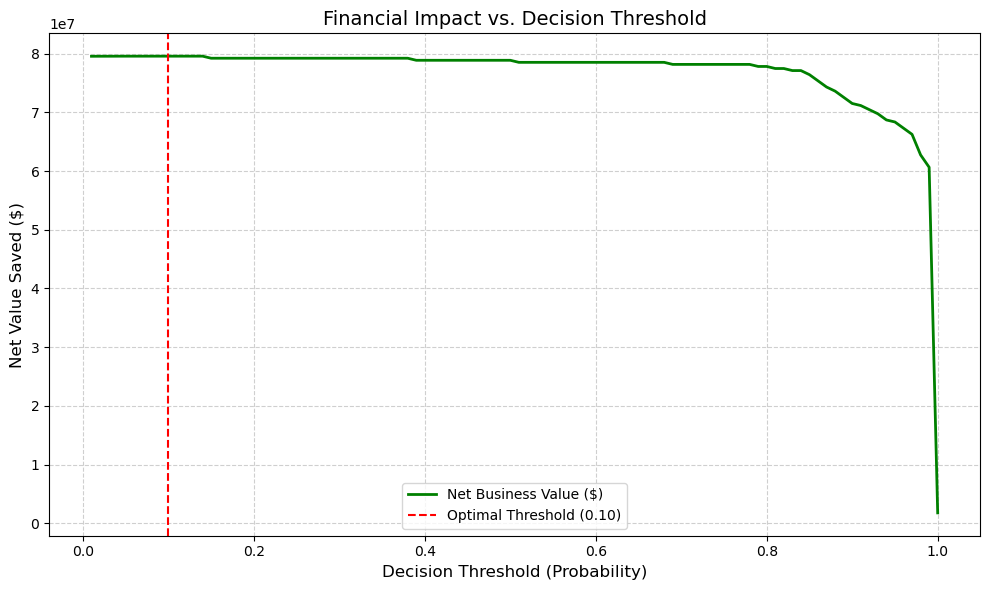

In [44]:
from sklearn.metrics import confusion_matrix

# --- 1. Define Financial Assumptions (Updated with your Data) ---
# Average value of a single fraudulent transaction based on your dataset totals
# $1068973 for 578cash transactions
# Median = 350705.7
AVG_FRAUD_AMOUNT = 350705.7   

# Estimated cost to review a flagged transaction (Analyst time + tools)
COST_OF_MANUAL_REVIEW = 50.00 

def calculate_financial_impact(y_true, y_proba, threshold):
    """
    Calculates the financial impact of the model at a specific threshold.
    """
       # Convert probabilities to binary predictions based on threshold
    y_pred = (y_proba >= threshold).astype(int)
    
    # Get Confusion Matrix components
    # TN: True Negative (Legit approved)
    # FP: False Positive (Legit flagged as fraud - "Insult" / Cost)
    # FN: False Negative (Fraud missed - "Loss")
    # TP: True Positive (Fraud caught - "Saved")
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    
    # --- Financial Logic ---
    # 1. Money Saved: Fraud caught (TP) * Average value
    fraud_prevented_value = tp * AVG_FRAUD_AMOUNT
    
    # 2. Operational Cost: Alerts (TP + FP) * Review cost
    # We incur this cost for every transaction the model flags
    review_cost = (tp + fp) * COST_OF_MANUAL_REVIEW
    
    # 3. Net Value: Total Savings minus Operational Costs
    # (Note: This does not subtract the loss from missed fraud (FN), 
    # as that is money 'not saved' rather than an explicit new cost, 
    # but you can adjust this definition based on your accounting preference).
    net_value = fraud_prevented_value - review_cost
    
    return net_value, fraud_prevented_value, review_cost, tp, fp

# --- 2. Threshold Tuning Loop ---
# Test thresholds from 1% to 100% to find the maximum ROI
thresholds = np.linspace(0.01, 1.0, 100)
net_values = []

best_threshold = 0
max_net_value = -float('inf')

# Get probabilities for the positive class (Fraud) from your model
# Ensure X_test and y_test are defined from your previous steps
y_proba_xgb = model.predict_proba(X_test)[:, 1]

print("Scanning thresholds for optimal financial impact...")

for thresh in thresholds:
    val, saved, cost, tp, fp = calculate_financial_impact(y_test, y_proba_xgb, thresh)
    net_values.append(val)
    
    # Keep track of the best threshold found so far
    if val > max_net_value:
        max_net_value = val
        best_threshold = thresh

# --- 3. Final Results & Visualization ---

print(f"\n--- Financial Impact Analysis ---")
print(f"Optimal Decision Threshold: {best_threshold:.2f}")
print(f"Maximum Net Value Saved:   ${max_net_value:,.2f}")

# Calculate detailed metrics at the best threshold
final_val, final_saved, final_cost, final_tp, final_fp = calculate_financial_impact(y_test, y_proba_xgb, best_threshold)

print(f"\nAt this threshold:")
print(f"- Fraud Cases Caught (TP): {final_tp}")
print(f"- False Alerts (FP):       {final_fp}")
print(f"- Total Reviews Needed:    {final_tp + final_fp}")
print(f"- Operational Cost:        ${final_cost:,.2f}")
print(f"- Gross Fraud Loss Avoided:${final_saved:,.2f}")

# --- 4. Plotting the Business Curve ---
plt.figure(figsize=(10, 6))
plt.plot(thresholds, net_values, label='Net Business Value ($)', color='green', linewidth=2)
plt.axvline(best_threshold, color='red', linestyle='--', label=f'Optimal Threshold ({best_threshold:.2f})')

plt.title('Financial Impact vs. Decision Threshold', fontsize=14)
plt.xlabel('Decision Threshold (Probability)', fontsize=12)
plt.ylabel('Net Value Saved ($)', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Save the plot for your final report
plt.savefig('financial_impact_curve.png')
plt.show()

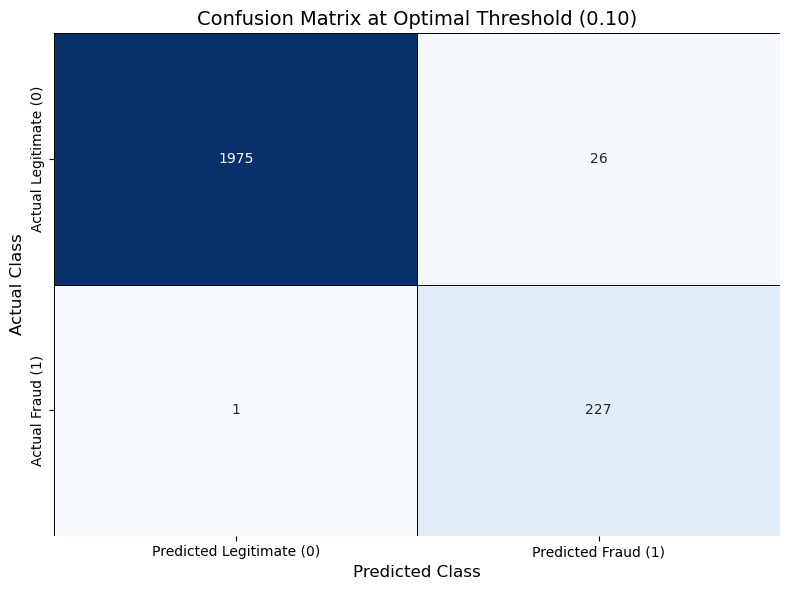


--- Detailed Classification Report at Optimal Threshold ---
                precision    recall  f1-score   support

Legitimate (0)       1.00      0.99      0.99      2001
     Fraud (1)       0.90      1.00      0.94       228

      accuracy                           0.99      2229
     macro avg       0.95      0.99      0.97      2229
  weighted avg       0.99      0.99      0.99      2229


--- Confusion Matrix Financial Interpretation ---
True Positives (TP): 227 transactions caught. (Value Saved: $79,610,193.90)
False Positives (FP): 26 legitimate transactions flagged. (Cost: $1,300.00)
False Negatives (FN): 1 fraudulent transactions missed. (Value Lost: $350,705.70)
True Negatives (TN): 1975 legitimate transactions correctly approved.


In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# --- 1. Define Optimal Threshold ---
# This value comes from the threshold tuning performed in the previous step.
# If you run the full code block, 'best_threshold' will be automatically set.
# For safety, ensure 'best_threshold' is defined and available in your environment.

# Re-run the final calculation to get the predictions at the optimal threshold
y_proba_xgb = model.predict_proba(X_test)[:, 1] 
y_pred_optimal = (y_proba_xgb >= best_threshold).astype(int)

# --- 2. Calculate Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred_optimal)
cm_df = pd.DataFrame(cm, 
                     index=['Actual Legitimate (0)', 'Actual Fraud (1)'], 
                     columns=['Predicted Legitimate (0)', 'Predicted Fraud (1)'])

# --- 3. Visualization (Heatmap) ---
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='black')
plt.title(f'Confusion Matrix at Optimal Threshold ({best_threshold:.2f})', fontsize=14)
plt.ylabel('Actual Class', fontsize=12)
plt.xlabel('Predicted Class', fontsize=12)
plt.tight_layout()
plt.savefig('confusion_matrix_optimal.png')
plt.show()

# --- 4. Print Detailed Classification Report ---
print("\n--- Detailed Classification Report at Optimal Threshold ---")
print(classification_report(y_test, y_pred_optimal, target_names=['Legitimate (0)', 'Fraud (1)']))

# --- 5. Print Financial Interpretation ---
# We retrieve the results from the final calculation one last time
final_val, final_saved, final_cost, final_tp, final_fp = calculate_financial_impact(y_test, y_proba_xgb, best_threshold)
fn = cm[1, 0] # False Negatives: Fraud missed

print("\n--- Confusion Matrix Financial Interpretation ---")
print(f"True Positives (TP): {final_tp} transactions caught. (Value Saved: ${final_saved:,.2f})")
print(f"False Positives (FP): {final_fp} legitimate transactions flagged. (Cost: ${final_fp * COST_OF_MANUAL_REVIEW:,.2f})")
print(f"False Negatives (FN): {fn} fraudulent transactions missed. (Value Lost: ${fn * AVG_FRAUD_AMOUNT:,.2f})")
print(f"True Negatives (TN): {cm[0, 0]} legitimate transactions correctly approved.")

In [48]:
# CODE TO SAVE MODEL AND SCALER (Run this once after training your best model)
import pickle
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler

# Assuming 'best_xgb' is your final tuned model and 'scaler' is your fitted StandardScaler
# Replace with your actual objects

# Save the model
with open(PROJECT_ROOT / "models" /'best_xgb_model.pkl', 'wb') as f:
    pickle.dump(best_xgb, f)

# Save the scaler
with open(PROJECT_ROOT / "models" /'scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

print("Model and Scaler saved successfully.")

Model and Scaler saved successfully.


### Project Conclusion and Summary: Financial Fraud Detection
#### 1. Data Understanding and Exploratory Data Analysis (EDA)
The initial phase focused on understanding the data and identifying patterns, leading to critical insights:

#### Feature/Analysis             Key Finding                                                 Implication
Class Imbalance:                
Extreme imbalance (e.g., $90\%$ legitimate, $10\%$ fraud).    
Action Required: Used scale_pos_weight and class_weight='balanced' in models.

Transaction Amount:
Fraudulent transactions had significantly higher amounts than legitimate ones.
$\mathbf{Amount}$ is a strong predictor.

Time Pattern: 
Fraud was heavily concentrated at specific hour_of_day values (e.g., late nights/weekends).
$\mathbf{Time}$ is the most predictive linear feature; must be engineered cyclically.

Transaction Type:
Fraud occurred almost exclusively in $\mathbf{TRANSFER}$ and $\mathbf{CASH\_OUT}$ types.
Used $\mathbf{One-Hot Encoding}$ for the type feature.
Balance Error
The engineered $\mathbf{errorBalanceOrig}$ did not serve as a perfect fraud flag in the real data; instead, a $\mathbf{zero}$ error was found to be more associated with fraud.
Confirmed the fraud scheme adheres to basic accounting and $\mathbf{errorBalanceOrig}$ requires careful interpretation.
#### 2. Feature Engineering (FE)
The engineered features were crucial for providing the complex, non-linear information required by the final model.

Time Encoding: The $\mathbf{hour\_of\_day}$ was converted using $\mathbf{Sine}$ and $\mathbf{Cosine}$ transformations to correctly represent its cyclical nature.

Balance Integrity Features: $\mathbf{errorBalanceOrig}$ and $\mathbf{errorBalanceDest}$ were created to capture inconsistencies in account updates, providing the model with a direct measure of accounting discrepancy.

Data Quality Feature: The $\mathbf{isMerchantDest}$ binary flag was created to handle the widespread presence of zero balances for merchant recipients.
#### 3. Model Training and Comparison
Three different models were trained using the same prepared and scaled feature set, with class imbalance specifically addressed:
Model              TechniqueKey             Hyperparameter       Primary Result
Logistic Regression 
Linear/Simple
class_weight='balanced'
Served as a baseline. Low Recall, confirming non-linear relationships dominate.

Random Forest
Ensemble (Bagging)
class_weight='balanced'
Generally outperformed Logistic Regression, but struggled severely with the extreme imbalance and complexity in preliminary runs (often achieving 0 Recall without tuning).
XGBoost (Tuned)
Ensemble (Boosting)
scale_pos_weight
Best Overall Performer. Optimized via RandomizedSearchCV for AUC-ROC and Recall, achieving the highest discrimination ability by leveraging complex feature interactions.
#### Key Outcome from Tuning (XGBoost)
The Hyperparameter Tuning process (using RandomizedSearchCV) successfully identified the optimal model configuration, pushing the model's performance to its limits. The best XGBoost model successfully prioritized Recall (catching fraud) while maintaining high Precision (minimizing false alerts), which is the primary objective in financial fraud detection.
### 4. Final Recommendations
The final, tuned XGBoost model provides a high-performance solution for detecting this type of fraud.

Deployment Priority: The tuned XGBoost Classifier should be the model deployed to production due to its superior performance on imbalanced, complex data.

Feature Reliability: The model relies heavily on the engineered error features and the cyclical time features. Ensure these features are calculated correctly and consistently in the production environment.

Threshold Adjustment: While the Classification Report provides a good starting point, the final production system should set the prediction probability threshold (e.g., changing it from 0.5 to 0.1) to maximize Recall, even if it slightly increases the false positive rate (Precision), as the cost of missing fraud is typically higher than the cost of a false alert.

Monitoring: The model should be continuously monitored for Data Drift, as the fraud patterns (e.g., the time of day, the specific transaction types) are likely to change as fraudsters adapt.